# March and April 2024

## Run Functions

In [55]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [56]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
np_files = [i for i in glob.glob('*_np.csv')]
nphl = pd.DataFrame()
for f in np_files:
    df = pd.read_csv(f)
    nphl = pd.concat([nphl,df])

nphl.groupby(['player_name','game_year'],as_index=False
          ).agg({'game_pk' : 'nunique'
                 ,'des' : 'count'
                } ## Group by player and year, count(distinct game_pk), count(1) pitches
               ).rename(columns = {'game_pk' : 'games'
                                   ,'des' : 'pitches'
                                  }
                       ) # Roughly 212 Player/Years of Non-Phillies Data


nphl['source'] = 'n'
nphl.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_y'))

print('Length of nphl dataframe: ' + str(len(nphl)))    


# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()




Length of nphl dataframe: 311816
Length of phils_sc dataframe: 416430


# Braves (H) 329-331
It is opening weekend in South Philadelphia as the Phillies embark on the new season by hosting the Atlanta Braves. Opening Day was rained out yesterday, so we are getting started on Friday afternoon. It is a big series for two teams expected to compete for the National League East throughout the season before both hoping to claim a World Series come October.

Let's not fuck around and get right into the first game.

### Game 1: Strider vs Wheeler
PHI Lineup: <br>
Schwarber 0 <br>
Turner 6 <br>
Harper 3 <br>
Realmuto 2 <br>
Bohm 5 <br>
Stott 4 <br>
Castellanos 9 <br>
Marsh 7 <br>
Rojas 8 <br>

ATL Lineup: <br>
Acuna 9 <br>
Albies 4 <br>
Riley 5 <br>
Olson 3 <br>
Ozuna 0 <br>
Harris II 8 <br>
Murphy 2 <br>
Arcia 6 <br>
Kelenic 7 <br>


In [3]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des',ascending=False)

,player_name,pitcher,des
25,"Wheeler, Zack",554430,3557
15,"Nola, Aaron",605400,3431
24,"Walker, Taijuan",592836,2837
20,"Suárez, Ranger",624133,2289
21,"Sánchez, Cristopher",650911,1498
19,"Strahm, Matt",621381,1459
10,"Kimbrel, Craig",518886,1253
18,"Soto, Gregory",642397,1025
8,"Hoffman, Jeff",656546,972
5,"Domínguez, Seranthony",622554,948


In [4]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

,player_name,batter,game_pk
14,"Schwarber, Kyle",656941,173
1,"Castellanos, Nick",592206,170
18,"Turner, Trea",607208,168
16,"Stott, Bryson",681082,164
0,"Bohm, Alec",664761,158
12,"Realmuto, J.T.",592663,148
10,"Marsh, Brandon",669016,142
8,"Harper, Bryce",547180,139
15,"Sosa, Edmundo",624641,90
3,"Cave, Jake",595909,64


In [5]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             ,669016 # Marsh
             ,679032 # Rojas
            ]
wheeler_id = 554430

In [6]:
pps[(pps.home_team == 'ATL')
    &(pps.game_year == 2023)
   ].groupby('batter',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,batter,des
8,663586,165
5,621566,162
6,645277,160
1,542303,141
3,606115,137
7,660670,127
11,671739,120
2,592696,103
9,669221,92
4,607680,44


In [7]:
braves_ids = [656941 # Acuna
             ,607208 # Albies
             ,547180 # Riley
             ,592663 # Olson
             ,664761 # Ozuna
             ,681082 # Harris II
             ,592206 # Murphy
             ,669016 # Arcia
             ,679032 # Kelenic
            ]
strider_id = 675911

In [8]:
pos[pos.pitcher == strider_id].groupby('events',as_index=False).agg({'des' : 'count'})

,events,des
0,double,7
1,double_play,3
2,field_error,1
3,field_out,81
4,fielders_choice_out,1
5,force_out,3
6,grounded_into_double_play,2
7,hit_by_pitch,2
8,home_run,9
9,single,24


In [9]:
phils_vs_strider = phils_sc[phils_sc.batter.isin(phils_ids)
                            &(phils_sc.pitcher == strider_id)
                           ]

In [10]:
df = phils_vs_strider
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",76,25,14,4,1.0,0.0,11.0,0.160,0.160,0.280,0.440,0.189
1,"Castellanos, Nick",91,24,15,5,2.0,1.0,8.0,0.217,0.250,0.478,0.728,0.306
2,"Harper, Bryce",111,22,13,6,2.0,3.0,6.0,0.316,0.409,0.632,1.041,0.438
3,"Marsh, Brandon",87,18,7,5,1.0,3.0,8.0,0.333,0.444,0.600,1.044,0.443
4,"Realmuto, J.T.",95,23,10,3,0.0,2.0,10.0,0.150,0.261,0.200,0.461,0.222
5,"Rojas, Johan",38,10,5,1,0.0,0.0,5.0,0.100,0.100,0.100,0.200,0.088
6,"Schwarber, Kyle",114,29,12,5,1.0,4.0,13.0,0.200,0.310,0.360,0.670,0.301
7,"Stott, Bryson",122,26,18,5,0.0,0.0,8.0,0.192,0.192,0.269,0.462,0.198
8,"Turner, Trea",59,18,17,3,1.0,0.0,0.0,0.176,0.222,0.412,0.634,0.270


In [11]:
pitch_mix(pos[pos.pitcher==strider_id]).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
1,FF,4-Seam Fastball,651,97.9,2386.5,7.4,65.9
2,SL,Slider,291,85.9,2375.5,11.1,29.5
0,CH,Changeup,46,87.3,2259.4,10.7,4.7


In [12]:
df[df.pitch_type == 'FF'].agg({'release_speed' : ['mean','std']
                               ,'release_spin_rate' : ['mean','std']
                              }).round(1)

,release_speed,release_spin_rate
mean,97.9,2389.2
std,1.1,76.0


### Game 2: Fried vs Nola
Well the first inning was just absurd. Acuna reached on an error by Bohm (I missed it) then Albies donged. <br>
Phillies loaded the bases just for Castellanos to stare at a Zone 5 FF that was called a ball by Bruce Dreckman. He walked (RBI) then Stott shoots one the other way to take the lead.

In [13]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
nola_id = 605400

In [14]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']

In [15]:
df = pd.concat([pos,whit])
df = df[(df.batter.isin(phils_ids))
   &(df.p_throws == 'L')
  ]

In [16]:
results('pitch_type').sort_values(by='pitches',ascending=False)

,pitch_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
6,FF,6309,1537.0,1013.0,366.0,62.0,180.0,326.0,0.276,0.364,0.499,0.863,0.272
13,SL,3054,739.0,446.0,171.0,29.0,57.0,223.0,0.258,0.325,0.461,0.786,0.288
12,SI,3002,819.0,607.0,224.0,26.0,78.0,125.0,0.308,0.380,0.490,0.869,0.283
0,CH,2392,701.0,546.0,170.0,19.0,35.0,117.0,0.259,0.297,0.401,0.698,0.218
2,CU,1506,371.0,238.0,77.0,9.0,24.0,100.0,0.230,0.291,0.370,0.661,0.224
5,FC,1161,300.0,227.0,94.0,12.0,23.0,49.0,0.342,0.393,0.564,0.957,0.280
14,ST,446,107.0,59.0,15.0,3.0,8.0,40.0,0.153,0.215,0.276,0.490,0.159
9,KC,314,91.0,61.0,27.0,3.0,3.0,27.0,0.314,0.330,0.488,0.818,0.258
15,SV,81,14.0,11.0,7.0,3.0,1.0,2.0,0.538,0.571,1.462,2.033,0.817
7,FS,73,24.0,11.0,2.0,0.0,2.0,11.0,0.091,0.167,0.136,0.303,0.110


How the fuck does Jesse Chavez keep leaving the Braves just to come back?

In [17]:
# How can I identify games in which Jesse Chavez pitched against the Phils?
# I need to pull opposing team pitcher ids.
# An easy way to do that would be to pull every pitch they have ever thrown, yeah that would work but it gets pretty big and creates dupes.

In [18]:
# There has to be a better way.
# Ok, I can use Statcast search to find at bats for a single player against Jesse Chavez, then go find that at bat in the pos data.

In [19]:
# Maybe I could look at descriptions.

In [20]:
pps[(pps.away_team == 'ATL')
    &(pps.pitcher == nola_id)
    &(pps.des.str.startswith('Ronald'))
   ].groupby('des',as_index=False).agg({'batter' : 'max'})

,des,batter
0,Ronald Acuna Jr. called out on strikes.,660670
1,Ronald Acuna Jr. doubles (1) on a sharp groun...,660670
2,Ronald Acuna Jr. flies out to center fielder ...,660670
3,"Ronald Acuna Jr. grounds out softly, first ba...",660670
4,Ronald Acuna Jr. grounds out to first baseman...,660670
5,"Ronald Acuna Jr. grounds out, shortstop Didi ...",660670
6,"Ronald Acuna Jr. grounds out, shortstop Trea ...",660670
7,"Ronald Acuna Jr. grounds out, third baseman A...",660670
8,Ronald Acuna Jr. reaches on a throwing error ...,660670
9,Ronald Acuna Jr. singles on a ground ball to ...,660670


In [21]:
pos[pos.game_date == '2023-09-20'].groupby('inning',as_index=False).agg({'pitcher' : 'nunique'})

,inning,pitcher
0,1,1
1,2,1
2,3,1
3,4,2
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [22]:
pos[pos.game_date == '2023-09-20'].groupby(['game_pk','inning'],as_index=False).agg({'pitcher' : 'max'})

,game_pk,inning,pitcher
0,716509,1,693821
1,716509,2,693821
2,716509,3,693821
3,716509,4,693821
4,716509,5,445926
5,716509,6,445926
6,716509,7,543272
7,716509,8,572955
8,716509,9,628452
9,716509,10,621345


In [23]:
pos[(pos.pitcher == 445926)
    &(pos.player_name == 'Marsh, Brandon')
    &(pos.game_date == '2023-09-20')
   ].groupby('des',as_index=False).agg({'home_team' : 'count'})
# So by the time I determined what Jesse Chavez's pitcher ID is, he is going to be removed from the game

,des,home_team
0,Brandon Marsh walks.,5


In [24]:
df[df.game_date == '2023-09-20'].groupby('pitcher',as_index=False).agg({'des' : 'count'})

,pitcher,des
0,543272,10
1,621345,21


In [25]:
df = pd.concat([pos[pos.batter.isin(phils_ids)],whit])
chavez = df[df.pitcher == 445926]

In [26]:
mcgs('player_name',chavez)[['player_name','pitches','plate_apps','hits','hrs','strikeouts','obp','slg']].round(3)

,player_name,pitches,plate_apps,hits,hrs,strikeouts,obp,slg
0,"Bohm, Alec",20,6,2.0,0.0,3.0,0.333,0.333
1,"Castellanos, Nick",25,8,3.0,0.0,1.0,0.375,0.500
2,"Harper, Bryce",14,5,3.0,0.0,0.0,0.600,0.800
3,"Merrifield, Whit",31,8,2.0,0.0,1.0,0.375,0.286
4,"Realmuto, J.T.",31,6,1.0,1.0,2.0,0.167,0.667
5,"Schwarber, Kyle",13,4,0.0,0.0,1.0,0.250,0.000
6,"Stott, Bryson",26,6,1.0,0.0,1.0,0.167,0.167
7,"Turner, Trea",2,1,0.0,0.0,0.0,0.000,0.000


In [27]:
chavez.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                                 ,'release_spin_rate' : ['count','min','max','mean','std']
                                                }).round(1)

pitch_type release_speed                        release_spin_rate          \
                     count   min   max  mean  std             count     min   
0         CH            20  84.0  86.9  85.6  0.9                20  1566.0   
1         CU             4  75.3  77.0  76.2  0.8                 4  2522.0   
2         FC            82  86.2  90.6  89.0  1.1                82  1987.0   
3         FF            10  89.6  92.6  90.8  1.2                10  2184.0   
4         SI            42  88.5  92.9  91.4  1.1                42  1815.0   
5         SL             4  85.6  86.9  86.3  0.6                 4  2226.0   

                          
      max    mean    std  
0  2159.0  1855.4  146.0  
1  2656.0  2608.5   60.3  
2  2467.0  2246.0   83.9  
3  2443.0  2308.4  110.4  
4  2283.0  2031.6  106.1  
5  2296.0  2275.0   32.8

In [28]:
mcgs('player_name',df[(df.p_throws == 'R')
   &(df.pitch_type == 'FC')
   &(df.release_speed >= 89-1.1)
   &(df.release_speed <= 89+1.1)
  ])[['player_name','pitches','plate_apps','hits','hrs','ba','ops']].round(3)

,player_name,pitches,plate_apps,hits,hrs,ba,ops
0,"Bohm, Alec",120,31,3.0,0.0,0.107,0.336
1,"Castellanos, Nick",74,21,8.0,0.0,0.400,0.929
2,"Harper, Bryce",152,37,14.0,3.0,0.438,1.420
3,"Merrifield, Whit",272,62,14.0,0.0,0.241,0.549
4,"Realmuto, J.T.",161,37,7.0,1.0,0.200,0.529
5,"Rojas, Johan",6,1,0.0,0.0,0.000,0.000
6,"Schwarber, Kyle",141,30,7.0,1.0,0.259,0.852
7,"Stott, Bryson",111,29,6.0,0.0,0.231,0.584
8,"Turner, Trea",41,7,1.0,0.0,0.167,0.619


In [29]:
# so how do I figure out Matzek

In [30]:
pos[(pos.batter == phils_ids[0])
    &(pos.home_team == 'ATL')
    &(pos.p_throws == 'L')
   ].groupby('pitcher',as_index=False).agg({'des' : 'count'
                                            ,'game_date' : 'max'}).sort_values(by='des',ascending=False)

,pitcher,des,game_date
3,608331,59,2023-10-09
4,621345,29,2023-10-09
5,656353,17,2022-05-23
6,669276,16,2022-10-11
7,689266,16,2023-05-25
2,554431,9,2022-09-18
0,476595,8,2023-09-18
8,694363,7,2023-05-26
1,543272,4,2023-09-20


In [31]:
# Ok so he has not pitched since 1-/5/2022

Fuck this shit, let's look ahead to Game 3.

### Game 3: Sale vs Suarez

In [32]:
phils_ids = [656941 # Schwarber
             ,607208 # Turner
             ,547180 # Harper
             ,592663 # Realmuto
             ,664761 # Bohm
             ,681082 # Stott
             ,592206 # Castellanos
             #,669016 # Marsh
             ,593160 # Merrifield
             ,679032 # Rojas
            ]
ranger_id = 624133

In [33]:
pos[(pos.game_year == 2017)
    &(pos.away_team == 'BOS')
   ].groupby(['game_date','pitcher'],as_index=False).agg({'inning' : 'nunique'
                                                          ,'des' : 'count'
                                                          ,'game_pk' : 'nunique'})
# I could have sniped Chris Sale's start against the Phillies in 2017 occurring on June 15, 2017. But I did not, instead I sleuthed it

,game_date,pitcher,inning,des,game_pk
0,2017-06-14,523260,1,14,1
1,2017-06-14,582494,1,13,1
2,2017-06-14,584171,4,50,1
3,2017-06-14,598264,1,27,1
4,2017-06-14,598271,3,44,1
5,2017-06-15,519242,8,110,1


In [34]:
sale_id = 519242
pos[(pos.pitcher == sale_id)
    &(pos.events == 'double')
    #&(pos.inning == 8)
   ]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
24251,CH,2016-09-21,86.7,3.13,5.20,"Rupp, Cameron",519237,519242,double,hit_into_play,...,0.721,0.878,1.242,1.569,2.015,0.2,-0.410,0.118,9.778,3.147
24257,SI,2016-09-21,92.2,3.06,5.38,"Joseph, Tommy",571830,519242,double,hit_into_play,...,0.721,0.878,1.242,1.569,2.015,0.2,-0.410,0.118,9.778,3.147
60011,SL,2017-06-15,79.3,3.21,5.51,"Kelly, Ty",571841,519242,double,hit_into_play,...,0.723,0.877,1.232,1.552,1.980,0.2,-0.423,0.122,10.048,3.158
60087,FF,2017-06-15,95.8,3.26,5.60,"Franco, Maikel",596748,519242,double,hit_into_play,...,0.723,0.877,1.232,1.552,1.980,0.2,-0.423,0.122,10.048,3.158
197385,SL,2023-05-05,78.9,3.29,5.35,"Castellanos, Nick",592206,519242,double,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255


In [35]:
pos[pos.pitcher == sale_id].groupby('game_date',as_index=False).agg({'inning' : 'nunique'
                                                                     ,'des' : 'count'
                                                                     ,'home_team' : 'max'
                                                                     ,'post_home_score' : 'max'
                                                                     ,'post_away_score' : 'max'
                                                                    })
# Chris Sale's only three starts against the Phillies in the statcast era have come at CBP.

,game_date,inning,des,home_team,post_home_score,post_away_score
0,2016-09-21,4,72,PHI,6,1
1,2017-06-15,8,110,PHI,1,0
2,2023-05-05,6,98,PHI,3,5


In [36]:
pos[(pos.pitcher == sale_id) & (pos.game_date == '2023-05-05')].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                                                           ,'at_bat_number' : 'nunique'
                                                                                                           ,'des' : 'count'})

,player_name,batter,at_bat_number,des
0,"Bohm, Alec",664761,3,15
1,"Castellanos, Nick",592206,3,7
2,"Guthrie, Dalton",656495,2,10
3,"Harper, Bryce",547180,3,7
4,"Harrison, Josh",543281,3,5
5,"Realmuto, J.T.",592663,3,15
6,"Schwarber, Kyle",656941,3,11
7,"Sosa, Edmundo",624641,3,18
8,"Turner, Trea",607208,3,10


In [37]:
phils_ids.append(624641) # Adding Edmundo to the phils ids

In [38]:
sale_vs_phillies = pd.concat([nphl[nphl.pitcher == sale_id], pos[(pos.pitcher == sale_id)&(pos.batter.isin(phils_ids))]
                             ])

In [39]:
df = sale_vs_phillies
df.groupby('player_name',as_index=False).agg({'batter' : 'max'
                                              ,'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                             }).sort_values(by='des',ascending=False)
df = df[df.batter.isin(phils_ids)]

In [40]:
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",15,3,2.0,1.0,0.0,1.0,0.0,0.500,0.667,0.500,1.167,0.526
1,"Castellanos, Nick",126,32,20.0,7.0,0.0,0.0,12.0,0.219,0.219,0.344,0.562,0.066
2,"Harper, Bryce",7,3,2.0,1.0,0.0,0.0,1.0,0.333,0.333,0.333,0.667,0.294
3,"Merrifield, Whit",105,31,20.0,7.0,0.0,1.0,10.0,0.233,0.258,0.367,0.625,0.000
4,"Realmuto, J.T.",15,3,2.0,1.0,0.0,0.0,1.0,0.333,0.333,1.000,1.333,0.523
5,"Schwarber, Kyle",11,3,1.0,0.0,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.000
6,"Sosa, Edmundo",18,3,0.0,0.0,0.0,0.0,2.0,0.000,0.333,0.000,0.333,0.242
7,"Turner, Trea",10,3,2.0,1.0,0.0,0.0,1.0,0.333,0.333,0.333,0.667,0.294


In [41]:
pitch_mix(pos[pos.pitcher == sale_id]).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
1,FF,4-Seam Fastball,93,95.8,2273.5,8.0,33.2
3,SL,Slider,75,79.6,2316.9,9.9,26.8
0,CH,Changeup,58,86.9,1980.8,9.9,20.7
2,SI,Sinker,54,94.3,2167.4,9.1,19.3


In [42]:
sale = pos[pos.pitcher == sale_id]
sale.groupby('pitch_type',as_index=False).agg({'release_speed' : ['count','min','max','mean','std']
                                               ,'release_spin_rate' : ['min','max','mean','std']
                                              }).round(2)

pitch_type release_speed                          release_spin_rate          \
                     count   min   max   mean   std               min     max   
0         CH            58  81.4  90.4  86.94  2.19            1602.0  2245.0   
1         FF            93  91.1  99.0  95.80  1.67            2042.0  2438.0   
2         SI            54  90.1  97.1  94.25  2.01            1819.0  2410.0   
3         SL            75  75.6  84.2  79.59  2.04            1981.0  2665.0   

                    
      mean     std  
0  1980.76  147.82  
1  2273.49   87.02  
2  2167.39  112.69  
3  2316.87  130.56

In [44]:
# all_abs[(all_abs.batter.isin(phils_ids))
#         &(all_abs.p_throws == 'L')
#         &(all_abs.pitch_type == 'FF')
#         &(all_abs.release_speed >= 95.8-1.67)
#         &(all_abs.release_speed <= 95.8+1.67)
#         &(all_abs.release_spin_rate >= 2273.49-87.02)
#         &(all_abs.release_spin_rate <= 2273.49+87.02)
#        ]

Does Ranger throw front hip sinkers to RHB? Yeah, I guess?

In [45]:
df = pps[(pps.pitcher == ranger_id)
    &(pps.stand == 'R')
    &(pps.pitch_type == 'SI')
    &(pps.zone.isin([1,4,7,11,13]))
   ]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2018,3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2019,24,8.0,2.0,0.0,0.0,2.0,4.0,0.000,0.250,0.000,0.250,0.172
2,2020,3,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.000,NaN,NaN,0.728
3,2021,164,41.0,16.0,2.0,0.0,6.0,19.0,0.057,0.195,0.057,0.252,0.144
4,2022,265,73.0,26.0,9.0,2.0,14.0,33.0,0.153,0.315,0.271,0.586,0.279
5,2023,133,57.0,22.0,10.0,1.0,9.0,26.0,0.213,0.333,0.298,0.631,0.291


In [46]:
ranger = pps[pps.pitcher == ranger_id]
rhb_pitch_mix(ranger).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
4,SI,Sinker,1823,92.7,1903.2,9.2,29.6
0,CH,Changeup,1496,84.4,1499.8,11.7,24.3
3,FF,4-Seam Fastball,1420,93.2,1955.4,7.8,23.1
1,CU,Curveball,633,76.1,2196.4,11.0,10.3
2,FC,Cutter,505,88.7,2038.0,8.5,8.2
5,SL,Slider,274,84.2,2093.4,10.4,4.5


In [47]:
ranger[(ranger.stand == 'R')
       &(ranger.zone.isin([1,4,7]))
       &(ranger.description == 'called_strike')
       &(ranger.events == 'strikeout')
       &(ranger.game_year == 2023)
       &(ranger.home_team == 'PHI')
      ][['game_date','inning']]#.groupby('away_team',as_index=False).agg({'des' : 'count'})

,game_date,inning
178182,2023-09-27,4
178949,2023-09-21,4
183904,2023-08-13,5
183928,2023-08-13,3
183972,2023-08-13,1
184683,2023-08-08,6
186402,2023-07-26,2
189129,2023-07-02,1
194058,2023-05-24,1
194755,2023-05-19,2


In [48]:
ranger.groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,description,des
0,ball,2701
7,hit_into_play,1430
2,called_strike,1323
3,foul,1286
9,swinging_strike,685
1,blocked_ball,203
5,foul_tip,67
10,swinging_strike_blocked,66
4,foul_bunt,14
6,hit_by_pitch,12


# Rhys Hoskins dirty slides

In [49]:
pos[pos.game_year==2022].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                    ,'des' : 'count'}).sort_values(by='des',ascending=False)

rhys_id = 656555

df = rhys_on_first = pos[pos.on_1b == rhys_id]

In [50]:
df = df[df.events.isna() == False]
df.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,events,des
4,field_out,293
16,strikeout,206
15,single,122
19,walk,81
7,force_out,67
8,grounded_into_double_play,66
10,home_run,41
1,double,39
14,sac_fly,15
2,double_play,11


In [51]:
df[df.events.isin(['other_out','caught_stealing_2b'])][['game_date'
                                                        ,'inning'
                                                        ,'player_name'
                                                        ,'events'
                                                       ]]

,game_date,inning,player_name,events
109828,2019-06-04,9,"Bruce, Jay",caught_stealing_2b
116830,2019-04-15,1,"Realmuto, J.T.",caught_stealing_2b
155736,2022-09-06,3,"Bohm, Alec",other_out
158073,2022-08-20,8,"Realmuto, J.T.",caught_stealing_2b


In [52]:
df[(df.events.isin(['field_out'
                   ,'force_out'
                   ,'grounded_into_double_play'
                   ,'field_error'
                   ,'fielders_choice'
                   ,'fielders_choice_out'
                  ]))
   &(df.home_team.isin(['PHI','NYM']))
   &(df.away_team.isin(['PHI','NYM']))  
  ][['game_date'
                       ,'home_team'
                       ,'away_team'
                       ,'inning'
                       ,'events'
                       ,'player_name'
                      ]].sort_values(by='game_date')


,game_date,home_team,away_team,inning,events,player_name
53095,2017-08-10,PHI,NYM,8,grounded_into_double_play,"Rupp, Cameron"
52608,2017-08-13,PHI,NYM,1,field_out,"Franco, Maikel"
52612,2017-08-13,PHI,NYM,1,field_out,"Williams, Nick"
49360,2017-09-04,NYM,PHI,2,grounded_into_double_play,"Franco, Maikel"
49370,2017-09-04,NYM,PHI,2,field_out,"Joseph, Tommy"
49110,2017-09-05,NYM,PHI,3,field_out,"Williams, Nick"
49160,2017-09-05,NYM,PHI,2,force_out,"Williams, Nick"
45934,2017-09-29,PHI,NYM,3,field_out,"Altherr, Aaron"
46022,2017-09-29,PHI,NYM,5,grounded_into_double_play,"Altherr, Aaron"
45881,2017-09-30,PHI,NYM,7,field_out,"Williams, Nick"


## Reds (H) 41-43

### Game 1: Abbott vs Sanchez

In [53]:
# I will come back to Cristopher Sanchez later, but this Abbott kid is going to be tough.

In [54]:
schwarber = pd.concat([nphl[nphl.player_name == 'Schwarber, Kyle'], pos[pos.player_name == 'Schwarber, Kyle']])
harper = pd.concat([nphl[nphl.player_name == 'Harper, Bryce'], pos[pos.player_name == 'Harper, Bryce']])
marsh = pd.concat([nphl[nphl.player_name == 'Marsh, Brandon'], pos[pos.player_name == 'Marsh, Brandon']])
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
castellanos = pd.concat([nphl[nphl.player_name == 'Castellanos, Nick'], pos[pos.player_name == 'Castellanos, Nick']])
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])

phils = pd.concat([schwarber
                   ,trea
                   ,harper
                   ,pos[pos.batter == 664761]
                   ,jt
                   ,pos[pos.batter == 681082]
                   ,castellanos
                   ,marsh
                   ,pos[pos.batter == 679032]
                   #,whit
                  ]
                 )

In [55]:
df = abbott = pd.read_csv('andrew abbott.csv')

In [56]:
lhb_pitch_mix(df).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,160,92.7,2205.3,8.2,49.8
3,ST,Sweeper,131,83.0,2624.0,9.4,40.8
1,CU,Curveball,23,81.2,2808.7,9.1,7.2
0,CH,Changeup,7,87.1,2007.9,8.4,2.2


In [57]:
df[df.pitch_type.isin(['FF','ST'])].groupby('pitch_type',as_index=False
                                           ).agg({'release_speed' : ['min','max','mean','std']
                                                  ,'release_spin_rate' : ['min','max','mean','std']
                                                  ,'pfx_x' : ['min','max','mean','std']
                                                  ,'pfx_z' : ['min','max','mean','std']
                                                 }).round(2)

pitch_type release_speed                    release_spin_rate          \
                       min   max   mean   std               min     max   
0         FF          90.4  95.3  92.73  0.81            1108.0  2553.0   
1         ST          78.5  85.9  82.95  1.12            1556.0  2902.0   

                   pfx_x                   pfx_z                    
      mean     std   min   max  mean   std   min   max  mean   std  
0  2207.43  107.82  0.17  1.18  0.65  0.16  0.88  1.74  1.36  0.13  
1  2645.07  130.35 -1.84  0.02 -0.98  0.35 -0.30  1.43  0.50  0.28

In [58]:
mcgs('player_name',phils[(phils.p_throws == 'L')
      &(phils.pitch_type == 'FF')
      &(phils.release_speed >= 92.73-0.81)
      &(phils.release_speed <= 92.73+0.81)
      &(phils.release_spin_rate >= 2207.43-107.82)
      &(phils.release_spin_rate <= 2207.43+107.82)
     ])[['player_name'
         ,'pitches'
         ,'plate_apps'
         ,'hits'
         ,'doubles'
         ,'triples'
         ,'hrs'
         ,'ba'
         ,'ops'
        ]
       ].round(3).sort_values(by='pitches',ascending=False)

,player_name,pitches,plate_apps,hits,doubles,triples,hrs,ba,ops
2,"Harper, Bryce",225,49,15,6.0,0.0,2.0,0.405,1.281
6,"Schwarber, Kyle",179,51,11,3.0,0.0,5.0,0.282,1.195
4,"Realmuto, J.T.",169,46,6,0.0,0.0,2.0,0.136,0.447
1,"Castellanos, Nick",159,44,10,4.0,1.0,2.0,0.263,0.920
8,"Turner, Trea",159,48,13,5.0,1.0,3.0,0.310,1.086
0,"Bohm, Alec",101,23,5,1.0,0.0,0.0,0.238,0.547
7,"Stott, Bryson",63,10,1,1.0,0.0,0.0,0.100,0.300
3,"Marsh, Brandon",59,17,4,1.0,0.0,0.0,0.235,0.529
5,"Rojas, Johan",13,5,1,0.0,0.0,0.0,0.250,0.650


In [59]:
rhb_pitch_mix(df).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,789,92.7,2207.9,8.3,50.1
0,CH,Changeup,303,86.6,2067.3,11.0,19.2
1,CU,Curveball,301,80.8,2796.0,9.8,19.1
4,ST,Sweeper,182,82.9,2660.0,8.9,11.5
3,PO,Pitch Out,1,89.1,2126.0,12.0,0.1


Does Harper ever hit RHP sliders for HRs? When they are inside?

In [60]:
pos[(pos.player_name == 'Harper, Bryce')
    &(pos.events == 'home_run')
    &(pos.zone.isin([3,6,9]))
    &(pos.p_throws == 'R')
    &(pos.pitch_type == 'SL')
   ]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
140294,SL,2021-06-30,85.7,-0.86,6.05,"Harper, Bryce",547180,542914,home_run,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
174068,SL,2022-04-17,80.1,-1.90,5.51,"Harper, Bryce",547180,622694,home_run,hit_into_play,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
183358,SL,2023-08-23,89.4,-1.74,5.38,"Harper, Bryce",547180,666808,home_run,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255
203626,SL,2023-10-07,85.6,-2.11,5.83,"Harper, Bryce",547180,675911,home_run,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255


### Game 2: Ashcraft vs Turnbull

I don't give a shit. Ricardo Pinto baby.

Harper Three HRs

In [61]:
# He did this once before against the Marlins in 2015
nphl[(nphl.player_name == 'Harper, Bryce')
     &(nphl.game_date == '2015-05-06')
    ].fielder_2.unique()

array([592663], dtype=int64)

In [62]:
nphl[nphl.batter == 592663].groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,player_name,des
16,"Realmuto, J.T.",8078
13,"Morton, Charlie",119
21,"Walker, Taijuan",77
22,"Wheeler, Zack",68
9,"Hand, Brad",50
2,"Anderson, Chase",37
12,"Moore, Matt",34
8,"Hamels, Cole",33
11,"Kimbrel, Craig",27
10,"Hoffman, Jeff",15


In [63]:
# Yes JT was catching that day.

### Game 3: Montas vs Wheeler

Frankie Montas? FRANKIE MONTAS!

In [64]:
# I thought of something interesting, but it turns out that no I did not.

In [65]:
# Zack Wheeler SI/FF velo Histograms
wheeler_id = 554430
pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].groupby(['game_year','pitch_type'],as_index=False
                                                ).agg({'release_speed' : ['min','max','mean','std']}).round(2)

game_year pitch_type release_speed                    
                                 min    max   mean   std
0      2020         FF          94.3   99.5  96.94  1.00
1      2020         SI          93.8   99.4  96.56  1.03
2      2021         FF          93.5  100.3  97.18  0.98
3      2021         SI          93.4   99.8  96.69  1.00
4      2022         FF          91.1   99.5  96.13  1.22
5      2022         SI          91.9   98.9  95.61  1.18
6      2023         FF          91.6   98.6  95.82  1.05
7      2023         SI          91.1   98.3  95.18  1.10

(array([   5.,   41.,  157.,  571., 1226., 2002., 1560.,  771.,  209.,
          25.]),
 array([ 91.1 ,  92.02,  92.94,  93.86,  94.78,  95.7 ,  96.62,  97.54,
         98.46,  99.38, 100.3 ]),
 <BarContainer object of 10 artists>)

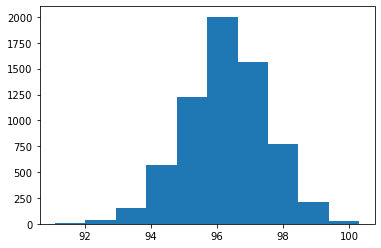

In [66]:
plt.hist(pps[(pps.pitcher == wheeler_id)
    &(pps.pitch_type.isin(['SI','FF']))].release_speed)

In [67]:
df = schwarber
schwarbs = results('game_year')

In [68]:
schwarbs['pa_per_bb'] = schwarbs.plate_apps/schwarbs.walks
schwarbs.round(3)

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,pa_per_bb
0,2015,1284,304,175,66,21.0,39,85,0.255,0.359,0.529,0.888,0.000,7.795
1,2016,100,25,15,7,0.0,4,6,0.333,0.440,0.381,0.821,0.000,6.250
2,2017,2198,506,284,92,31.0,61,155,0.209,0.312,0.461,0.774,0.000,8.295
3,2018,2144,492,291,102,26.0,58,141,0.237,0.327,0.465,0.792,0.000,8.483
4,2019,2539,606,379,132,38.0,65,156,0.249,0.333,0.530,0.864,0.000,9.323
5,2020,989,230,128,36,11.0,32,67,0.185,0.309,0.385,0.693,0.000,7.188
6,2021,2195,521,307,115,35.0,68,138,0.258,0.363,0.539,0.902,0.000,7.662
7,2022,3211,737,418,138,52.0,95,218,0.218,0.324,0.508,0.832,0.358,7.758
8,2023,3295,771,403,127,52.0,128,231,0.201,0.340,0.487,0.826,0.355,6.023


How many games has Whit played at third in his career?
This is not something I ahve the data for.
Seven. He has played 33 innings there in his career.

In [69]:
df = castellanos
results('pitch_number')

,pitch_number,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,1,5228,746,734.0,265.0,47.0,0.0,0.0,0.364,0.367,0.646,1.013,0.117
1,2,4483,782,774.0,298.0,47.0,0.0,0.0,0.389,0.390,0.707,1.097,0.108
2,3,3700,947,733.0,269.0,43.0,0.0,205.0,0.289,0.294,0.518,0.811,0.082
3,4,2753,922,512.0,186.0,32.0,56.0,346.0,0.219,0.270,0.394,0.664,0.052
4,5,1831,862,440.0,162.0,19.0,64.0,354.0,0.205,0.266,0.331,0.597,0.073
5,6,969,564,255.0,84.0,10.0,105.0,201.0,0.185,0.339,0.281,0.620,0.064
6,7,404,244,105.0,48.0,3.0,49.0,90.0,0.246,0.398,0.385,0.782,0.071
7,8,160,106,46.0,13.0,2.0,28.0,31.0,0.169,0.396,0.312,0.708,0.075
8,9,54,33,18.0,6.0,1.0,7.0,8.0,0.231,0.394,0.346,0.740,0.087
9,10,21,17,9.0,2.0,0.0,4.0,4.0,0.154,0.353,0.154,0.507,0.000


In [70]:
#df = marsh
df['month'] = pd.to_datetime(df.game_date).dt.month

In [71]:
results('month')

,month,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,3,100,30,18,9,0.0,2,10,0.321,0.367,0.464,0.831,0.071
1,4,3032,788,532,211,26.0,55,196,0.292,0.343,0.491,0.834,0.097
2,5,3353,901,637,229,27.0,52,205,0.274,0.319,0.458,0.776,0.075
3,6,3202,855,602,225,28.0,56,189,0.286,0.337,0.465,0.802,0.082
4,7,2987,805,541,184,30.0,48,209,0.246,0.297,0.435,0.732,0.063
5,8,3374,897,625,235,51.0,49,210,0.282,0.328,0.535,0.863,0.090
6,9,2896,775,558,213,36.0,40,173,0.295,0.330,0.537,0.867,0.055
7,10,587,160,106,26,6.0,11,42,0.178,0.238,0.363,0.601,0.205
8,11,77,16,9,1,0.0,1,6,0.067,0.125,0.067,0.192,0.098


In [72]:
rojas_id =679032
df = pos[pos.batter == rojas_id]
results('p_throws').sort_values(by='pitches',ascending=False)

,p_throws,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
1,R,456,134,91,28,2.0,4,35,0.228,0.261,0.358,0.619,0.264
0,L,270,76,51,21,0.0,2,22,0.300,0.316,0.386,0.702,0.300


In [73]:
wheeler_id = 554430
wheels = pd.concat([pps[pps.pitcher == wheeler_id]
                    ,nphl[nphl.player_name == 'Wheeler, Zack']
                   ]
                  )

In [74]:
df = wheels[wheels.game_type != 'R']
games = results('game_pk')
games[games.strikeouts >=10]

,game_pk,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
9,748563,92,24,13,3.0,1.0,1.0,10,0.13,0.167,0.261,0.428,0.186


In [75]:
harper_id = 547180
harper = pd.concat([pos[pos.batter == harper_id]
                   ,nphl[nphl.player_name == 'Harper, Bryce']
                    ])
df = harper
games = results('game_pk')
four_hit_games = games[games.hits >= 4]

In [76]:
df[df.game_pk.isin(four_hit_games.game_pk.tolist())].groupby('game_pk',as_index=False
                                                            ).agg({'game_date' : 'max'
                                                                   ,'home_team' : 'max'
                                                                   ,'away_team' : 'max'
                                                                  })

,game_pk,game_date,home_team,away_team
0,490201,2017-04-10,WSH,STL
1,490324,2017-04-19,ATL,WSH
2,490419,2017-04-26,COL,WSH
3,491507,2017-07-18,LAA,WSH
4,565420,2019-04-19,COL,PHI
5,633393,2021-07-06,CHC,PHI
6,661542,2022-05-25,ATL,PHI


Should Bohm have pitch hit for Marsh against Justin Wilson? Nah, he does not do that great against FF like Wilson's.

In [77]:
# Getting a pitch profile of Justin Wilson is going to be really difficult. Not that difficult, just not something I care to do.

In [78]:
df = pd.read_csv('justin wilson.csv')
df.groupby('pitch_type', as_index=False).agg({'release_speed' : ['count','mean','std']
                                              ,'release_spin_rate' : ['mean','std']
                                             }).round(1)#.sort_values(by='count',ascending=False)

pitch_type release_speed            release_spin_rate       
                     count  mean  std              mean    std
0         CH            18  88.5  1.3            1523.5  211.4
1         CU           301  79.9  2.9            2259.8  640.4
2         FC          1914  90.7  1.6            2409.7  191.6
3         FF          4610  95.4  1.4            2369.3  122.8
4         FS             2  84.1  1.8            1345.0    0.0
5         IN            29  57.0  5.9            1409.7   58.2
6         PO             4  87.8  5.5               NaN    NaN
7         SI          1095  95.6  1.5            2301.6  168.4
8         SL           367  84.5  3.3            2495.4  267.0

In [79]:
bohm = pos[pos.player_name == 'Bohm, Alec']
df = bohm[(bohm.pitch_type == 'FC')
          &(bohm.p_throws == 'L')
          &(bohm.release_speed >= 90.7 - 1.6)
          &(bohm.release_speed <= 90.7 + 1.6)
          &(bohm.release_spin_rate >= 2409.7 - 191.6)
          &(bohm.release_spin_rate <= 2409.7 + 191.6)
         ]
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",30,10,7,4,0.0,1,2,0.444,0.5,0.444,0.944,0.423


In [80]:
marsh = pd.concat([pos[pos.player_name == 'Marsh, Brandon']
                   ,nphl[nphl.player_name == 'Marsh, Brandon']
                  ])
df = marsh[(marsh.pitch_type == 'FF')
          &(marsh.p_throws == 'L')
          &(marsh.release_speed >= 95.4 - 1.4)
          &(marsh.release_speed <= 95.4 + 1.4)
          &(marsh.release_spin_rate >= 2369.3 - 122.8)
          &(marsh.release_spin_rate <= 2369.3 + 122.8)
         ]
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Marsh, Brandon",73,19,8,4,0.0,1,10,0.222,0.263,0.278,0.541,0.195


In [81]:
nphl[nphl.game_date == '2015-05-06'].groupby('fielder_2',as_index=False).agg({'des' : 'count'})

,fielder_2,des
0,452095,24
1,454560,14
2,455117,9
3,467092,16
4,506747,7
5,521692,13
6,571466,12
7,592663,9


In [82]:
jt = pd.concat([pos[pos.batter == 592663]
                ,nphl[nphl.player_name == 'Realmuto, J.T.']
               ])
jt['month'] = pd.to_datetime(jt.game_date).dt.month
df = jt[jt.game_year >= 2019]
results('month').sort_values(by='ops',ascending=False)

,month,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,3,63,17,12,6,1.0,2.0,3,0.429,0.471,0.857,1.328,0.515
5,8,1933,490,331,129,24.0,34.0,115,0.291,0.351,0.553,0.904,0.379
4,7,1404,365,249,90,18.0,25.0,85,0.272,0.329,0.489,0.818,0.347
7,10,496,126,82,31,7.0,7.0,34,0.265,0.317,0.496,0.813,0.349
6,9,1701,440,309,107,22.0,26.0,94,0.266,0.323,0.474,0.797,0.341
1,4,1456,367,248,93,9.0,25.0,86,0.281,0.341,0.426,0.767,0.331
2,5,1322,340,223,69,8.0,29.0,80,0.231,0.312,0.401,0.713,0.309
3,6,1502,381,260,82,12.0,29.0,87,0.236,0.302,0.406,0.708,0.306
8,11,66,17,6,1,0.0,0.0,10,0.062,0.118,0.062,0.180,0.094


In [83]:
nelson = pd.concat([pps[pps.pitcher == 656793], nphl[nphl.player_name == 'Nelson, Nick']])
rhb_pitch_mix(nelson).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,511,96.3,2018.8,8.1,47.5
4,SL,Slider,300,88.5,2360.0,10.5,27.9
0,CH,Changeup,199,88.4,1841.7,9.9,18.5
1,CU,Curveball,49,81.3,2332.8,10.2,4.6
3,SI,Sinker,16,92.6,1972.4,10.0,1.5


In [84]:
df = nelson#pps[pps.pitcher == 656793]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2020,402,97,66,21,4.0,11,20,0.247,0.330,0.412,0.742,0.000
1,2021,338,78,37,15,0.0,16,22,0.263,0.436,0.421,0.857,0.000
2,2022,1234,311,200,66,1.0,38,69,0.254,0.347,0.346,0.693,0.310
3,2023,69,20,15,2,1.0,2,3,0.111,0.200,0.278,0.478,0.214


In [85]:
pps[pps.game_year == 2023].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'
                                                                      ,'pitcher' : 'max'}).sort_values(by='game_pk')

,player_name,game_pk,pitcher
14,"Nelson, Nick",1,656793
22,"Uelmen, Erich",1,657272
17,"Plassmeyer, Michael",1,674681
7,"Harrison, Josh",2,543281
13,"Moore, McKinley",3,686842
3,"Clemens, Kody",4,665019
6,"Falter, Bailey",8,663559
9,"Kerkering, Orion",10,689147
11,"Lorenzen, Michael",13,547179
16,"Ortiz, Luis F.",14,656814


In [86]:
# Rodolfo Castro hit a bunch of home runs to start 2021? His first five hits of the season were home runs lol

In [87]:
rodolfo = nphl[nphl.player_name == 'Castro, Rodolfo']

In [88]:
df = rodolfo

In [89]:
df[(df.game_year == 2021)
   #&(df.game_date <= '2021-07-30')
   &(df.events == 'home_run')
   &(df.type == 'X')
  ].sort_values(by='game_date')

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,source
2285,SI,2021-07-09,89.1,-1.75,5.99,"Castro, Rodolfo",666801,607374,home_run,hit_into_play,...,3,12,3,12,Standard,Standard,222.0,-0.001,0.974,n
2246,FF,2021-07-11,90.6,-1.87,6.00,"Castro, Rodolfo",666801,595191,home_run,hit_into_play,...,1,5,1,5,Infield shift,Standard,217.0,-0.033,0.951,n
2260,SI,2021-07-11,96.6,-1.42,6.06,"Castro, Rodolfo",666801,544727,home_run,hit_into_play,...,4,5,4,5,Standard,Standard,231.0,-0.168,1.965,n
2216,CH,2021-07-28,87.6,1.61,5.75,"Castro, Rodolfo",666801,641778,home_run,hit_into_play,...,7,1,1,7,Standard,Standard,136.0,0.008,0.924,n
2225,SL,2021-07-28,85.6,3.41,4.96,"Castro, Rodolfo",666801,623352,home_run,hit_into_play,...,7,3,3,7,Standard,Standard,203.0,0.004,1.611,n


## Nationals (A) 45-47

### Game 1: Corbin vs Nola

### Game 2: vs Suarez

### Game 3: Gore vs Sanchez

## Cardinals (A) 48-410

### Game 1: Mikolas vs Turnbull
Turnbull pitching pretty well thru 5. Johan Rojas 2 for 2 with an RBI. Ya momma sitting on ma dick!

### Game 2: vs Wheeler

### Game 3: vs Nola

Putting in some Retrospective work which is interesting.

#### Masyn Winn's arm
Is he related to Randy Winn?

Masyn Winn, who this year has the seventh-highest max velocity on a throw and sixth best **Arm Strength** (Baseball Savant) in the big leagues, has six "qualifying" throws. This is how they breakdown.

Masyn Winn Six Qualifying Throws
1. E6, Masyn Winn throws a ball into the stands
2. E6, Masyn Winn throws a ball off the bag
3. E6, Masyn Winn pulls Goldie off the bag with the throw
4. 6-3, Nice diving play and strong throw gets... Rhys Hoskins.
5. 4-6-3, Bryce Harper trotting down to first gets gunned down by some measure with this dart thrown by Winn.
6. 1B, Trea Turner hustles out an infield single against one of the best throwers in baseball.

Let's get fired up about Trea Turner with the stick!

In [96]:
df = pos[pos.game_year == 2024]

In [97]:
player_results = results('player_name')
home_results = results('home_team')
#id_results = results('batter')

In [98]:
df = player_results
df = trea = df[df.player_name == 'Turner, Trea']
trea

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
13,"Turner, Trea",401,103,75,32,2.0,8.0,19,0.337,0.388,0.484,0.873,0.387


In [ ]:
pos[(pos.game_year == 2024)
    &(pos.
   ]

In [87]:
# Fastest pitches in 2024

In [86]:
#def summarize(df):
df = pps[pps.game_year == 2024]    
df[['pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'game_date'
    ,'player_name'
    ,'inning'
   ]].sort_values(by='release_speed',ascending=False
                 ).reset_index(drop=True).head(10)

    
    
    
    
    
    
#summarize(pos[pos.game_year == 2024])

,pitch_type,release_speed,release_spin_rate,game_date,player_name,inning
0,SI,101.0,2205.0,2024-03-29,"Alvarado, José",8
1,SI,100.8,2201.0,2024-03-30,"Soto, Gregory",8
2,SI,100.5,2232.0,2024-03-29,"Alvarado, José",8
3,SI,100.5,2228.0,2024-03-29,"Alvarado, José",8
4,SI,100.5,2220.0,2024-04-13,"Soto, Gregory",7
5,SI,100.1,2118.0,2024-03-29,"Alvarado, José",8
6,SI,100.1,2497.0,2024-03-30,"Soto, Gregory",8
7,SI,99.6,2009.0,2024-03-29,"Alvarado, José",8
8,FF,99.5,2274.0,2024-04-08,"Soto, Gregory",10
9,SI,99.5,2145.0,2024-03-31,"Alvarado, José",9


## Pirates (H) 411-414

### Game 1: Jones vs Suarez

### Game 2:  vs Sanchez

### Game 3:  vs Turnbull

### Game 4: Keller vs Wheeler

# Rockies (H) 415-417
## Game 1: Quantrill vs Nola
The Phillies are locked in a 1-1 grind it out game with a benches clearing incident with the Colorado Rockies. Jeff Hoffman just tackled pinch runner Kyle Freeland at the plate and almost certainly dislocated Freeland's non-throwing shoulder. Ouch. Two guys who came up together in Colorado's system.

The dog is barking next door. Nice.

In [1]:
# Kyle Tucker said me too! What a hit.

In [4]:
# who the fuck is due up for the Phillies in the Bottom of the 10th?

In [5]:
whit = nphl[nphl.player_name == 'Merrifield, Whit']
#rojas = pos[pos.batter == ]
bohm = pache = pos[pos.player_name == 'Bohm, Alec']

In [7]:
df = bohm[bohm.inning > 9]
results('home_team')

,home_team,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,ATL,8,2,1.0,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.000,0.000
1,CLE,2,1,1.0,1.0,0.0,0.0,0.0,1.0,1.000,1.0,2.000,0.883
2,HOU,3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000
3,LAD,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000
4,MIA,5,1,1.0,1.0,0.0,0.0,0.0,1.0,1.000,1.0,2.000,0.883
5,NYM,11,3,2.0,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.000,0.000
6,OAK,6,2,1.0,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.000,0.000
7,PHI,36,13,11.0,5.0,0.0,0.0,2.0,0.5,0.385,0.5,0.885,0.339
8,PIT,15,2,2.0,2.0,0.0,0.0,0.0,1.0,1.000,1.0,2.000,0.884
9,STL,3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.000,0.000


In [8]:
pos[pos.game_year == 2023].groupby('player_name',as_index=False).agg({'batter' : 'max'
                                                                      ,'des' : 'count'
                                                                     }).sort_values(by='des')

,player_name,batter,des
19,"Wilson, Weston",642215,96
6,"Guthrie, Dalton",656495,113
5,"Ellis, Drew",656403,128
2,"Castro, Rodolfo",666801,141
7,"Hall, Darick",669742,205
9,"Harrison, Josh",543281,392
11,"Pache, Cristian",665506,426
17,"Stubbs, Garrett",596117,496
4,"Clemens, Kody",665019,609
13,"Rojas, Johan",679032,726


In [9]:
pache = pos[pos.batter == 665506]
df = pache
results('home_team')

,home_team,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,ATL,16,3,1.0,0.0,0.0,1.0,1.0,0.000,0.333,0.000,0.333,0.232
1,CHC,15,4,3.0,1.0,0.0,0.0,1.0,0.250,0.250,0.250,0.500,0.221
2,CIN,8,3,2.0,1.0,0.0,0.0,1.0,0.333,0.333,0.333,0.667,0.294
3,CWS,10,2,1.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
4,HOU,6,2,2.0,1.0,0.0,0.0,0.0,0.500,0.500,1.000,1.500,0.622
5,MIA,29,7,5.0,3.0,1.0,0.0,2.0,0.429,0.429,1.000,1.429,0.590
6,MIL,14,3,0.0,0.0,0.0,2.0,1.0,0.000,0.667,0.000,0.667,0.464
7,NYM,56,11,6.0,2.0,0.0,1.0,4.0,0.200,0.273,0.200,0.473,0.224
8,NYY,3,2,2.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
9,OAK,34,9,6.0,2.0,0.0,1.0,2.0,0.250,0.333,0.500,0.833,0.354


In [10]:
# Step 1: Define a Quality At Bat
# Step 2: Look at Phillies Quality At Bats
# Step 3: How many Quality At Bats does Nick Castellanos have when Johan Rojas is in the batting order?

## Game 2: Gomber vs Suarez

Brandon Marsh vs Charlie Blackmon
<br>Paul fucking Skenes
<br>Phillies Quality ABs
<br>Alec Bohm being that guy?
<br>Batting average over the course of the season, cumulative, running ba
<br>running revPAR
<br>Quarterly performance of key metrics
<br>FC-CU sequence

### Mr. Rager
<br>Ranger longest starts of his career
<br>Ranger pitches_per_start by month
<br>Ranger length of start

In [19]:
# Real proud of this pull. Get to Ranger Suarez ID by looking at Phillies LHP in the Statcast era. Ranger has thrown more pitches
# than any other South Paw for the Phillies since 2015. Ranger tossed 19.6% of the pitches thrown by the Phillies from the right
# side of the rubber (batter's perspective). 1/5th of pitches thrown by a left-handed Phillies pitcher between 2015 and 2023
# came from Ranger Suarez. This is a testament to you, Mr. Rager.
pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)
df = pps[pps.p_throws == 'L'].groupby('player_name', as_index=False).agg({'des' : 'count'
                                                                     ,'pitcher' : 'max'
                                                                    }).sort_values(by='des',ascending=False)

tot = df.des.sum()
df['pct_of_total'] = round((df.des/tot),3)
df

ranger_id = 624133

In [21]:
ranger = pps[pps.pitcher == ranger_id]
df = ranger
game_results = results('game_pk')
game_results.agg({'pitches' : ['min','max']})

,pitches
min,2
max,110


In [28]:
df = ranger.merge(game_results, left_on = 'game_pk', right_on = 'game_pk', suffixes = ('','_gr'))
df[df.pitches == 110].game_date.unique()

array(['2022-06-29'], dtype=object)

In [ ]:
df

In [27]:
df = pos[(pos.batter == ranger_id)
    &(pos.game_date == '2021-09-25')
   ]
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Suárez, Ranger",9,3,2,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0


Ranger Longest Starts by Month
df

In [32]:
df.groupby('game_date',as_index=False).agg({'pitches' : 'max'}).sort_values(by='pitches',ascending=False).head(15)

,game_date,pitches
97,2022-06-29,110
136,2023-09-16,106
123,2023-06-14,105
125,2023-06-27,104
88,2022-05-09,104
107,2022-09-10,103
122,2023-06-09,103
89,2022-05-14,102
80,2021-09-20,102
82,2021-10-01,101


In [33]:
df[df.pitches >= 100].game_date.unique()

array(['2021-10-01', '2021-09-20', '2022-09-10', '2022-06-29',
       '2022-05-31', '2022-05-14', '2022-05-09', '2023-09-16',
       '2023-06-27', '2023-06-14', '2023-06-09', '2023-06-04'],
      dtype=object)

In [34]:
# Sloppy but the answer is no not really

<br>Cristian Pache who the fuck do you think you are?

In [37]:
# How to Snipe Cristian Pache? WPA
pos[pos.game_year == 2023].groupby('player_name',as_index=False
                                  ).agg({'batter' : 'max'
                                         ,'delta_home_win_exp' : 'min'
                                        }).sort_values(by='delta_home_win_exp')
pache_id = 665506
pache_phils = pos[pos.batter == pache_id]
pache_nphl = nphl[nphl.player_name == 'Pache, Cristian']
pache = pd.concat([pache_phils, pache_nphl])

In [41]:
pache_defensive_opps = pps[((pps.fielder_8 == pache_id) & (pps.hit_location == 8)) # Center Field
                           | ((pps.fielder_7 == pache_id) & (pps.hit_location == 7)) # Left Field
                           | ((pps.fielder_9 == pache_id) & (pps.hit_location == 9)) # Right Field
                          ]
pache_defensive_opps.groupby('events', as_index=False).agg({'des' : 'count'})

,events,des
0,double,11
1,field_out,65
2,sac_fly,3
3,single,52
4,triple,1


In [45]:
pache_defensive_opps[pache_defensive_opps.events == 'triple'][['hit_location'
                                                               ,'game_date'
                                                               ,'player_name'
                                                               ,'launch_speed'
                                                               ,'launch_angle'
                                                               ,'estimated_ba_using_speedangle'
                                                               ,'events'
                                                               ,'inning'
                                                               ,'inning_topbot'
                                                               ,'home_team'
                                                               ,'away_team'
                                                              ]]

,hit_location,game_date,player_name,launch_speed,launch_angle,estimated_ba_using_speedangle,events,inning,inning_topbot,home_team,away_team
178169,9.0,2023-09-27,"Suárez, Ranger",107.1,10.0,0.874,triple,5,Top,PHI,PIT


## Game 3: ? vs Sanchez

# White Sox (H) 419-421

## Game 1: Crochet vs Turnbull
First game of the season for Kellen. Took Seana along. It was a nice time. Chilly night. She was worried about having to take a quiz. I had a few beveraginos. Wet and cold. Bohm two 3-R HRs in first two ABs. City Connect jersey making its second appearance.

### Opportunities to SS and 3B

In [20]:
pps[(pps.game_date == '2024-04-19')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


,inning,hit_location,outs_when_up,fielder_5,fielder_6,launch_speed,launch_angle,launch_speed_angle,estimated_ba_using_speedangle,events,release_speed,pitch_type,release_spin_rate,zone,stand
203252,5,5.0,2,664761,607208,95.2,-17.0,2.0,0.143,field_out,91.6,FF,2444.0,2.0,L
203273,4,6.0,0,664761,607208,97.8,-16.0,2.0,0.189,field_out,90.1,FF,2507.0,8.0,R
203344,8,6.0,1,664761,607208,93.0,-7.0,2.0,0.191,single,94.4,SI,2364.0,4.0,L


## Game 2: Soroka vs Wheeler
I did not watch this game since it was 4/20 and Knicks vs. Sixers G1 was that night.
Wheeler takes no-no into the 8th inning. Good velo, but induced a lot of weak contact and defense made the plays????

### Opportunities to SS and 3B

In [21]:
pps[(pps.game_date == '2024-04-20')
    &(pps.hit_location.isin([5,6]))
   ][['inning'
      ,'hit_location'
      ,'outs_when_up'
      ,'fielder_5'
      ,'fielder_6'
      #,'pitcher'
      #,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
      ,'estimated_ba_using_speedangle'
      ,'events'
      ,'release_speed'
      ,'pitch_type'
      ,'release_spin_rate'
      ,'zone'
      ,'stand'
     ]
    ]


,inning,hit_location,outs_when_up,fielder_5,fielder_6,launch_speed,launch_angle,launch_speed_angle,estimated_ba_using_speedangle,events,release_speed,pitch_type,release_spin_rate,zone,stand
203077,8,6.0,0,664761,607208,90.6,11.0,4.0,0.686,field_out,95.2,FF,2412.0,2.0,L
203132,4,6.0,1,664761,607208,90.3,-31.0,2.0,0.071,field_out,95.5,FF,2465.0,1.0,L
203142,3,6.0,2,664761,607208,97.1,3.0,4.0,0.474,field_out,94.2,SI,2163.0,2.0,L
203150,2,6.0,2,664761,607208,98.9,-4.0,2.0,0.283,field_out,81.6,CU,2799.0,13.0,L
203153,2,6.0,1,664761,607208,53.7,-8.0,1.0,0.091,field_out,84.4,ST,2610.0,11.0,R
203182,8,5.0,2,664761,607208,86.1,72.0,3.0,0.001,field_out,97.7,FF,2597.0,5.0,L


### Eloy Jimenez BIP

In [56]:
pps[pps.game_date == '2024-04-20'].groupby('batter',as_index=False).agg({'des' : 'count'
                                              ,'game_pk' : 'nunique'
                                              ,'stand' : 'max'
                                              ,'launch_speed' : 'max'
                                             }
                                            ).sort_values(by='launch_speed',ascending=False)

# Snipe Eloy ID by grouping pps at batter level and sorting by launch speed

eloy_id = 650391

pps[(pps.batter == eloy_id)
    &(pps.type == 'X')
   ].groupby(['player_name'
              ,'p_throws'
              #,'pitch_type'
              #,'events'
              #,'description'
             ]
             ,as_index=False
            ).agg({'launch_speed' : 'mean'
                  ,'des' : 'count'
                  #,'game_pk' : 'nunique'
                  ,'launch_angle' : 'mean'
                   ,'pitcher' : 'max'
                   ,'estimated_ba_using_speedangle' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                  }
                 ).sort_values(by='des',ascending=False).round(3)

,player_name,p_throws,launch_speed,des,launch_angle,pitcher,estimated_ba_using_speedangle,hit_distance_sc
14,"Wheeler, Zack",R,76.525,4,23.000,554430,0.108,168.500
2,"Falter, Bailey",L,81.100,3,-34.333,663559,0.197,17.667
12,"Vargas, Jason",L,92.800,3,-1.333,450306,0.464,65.333
13,"Walker, Taijuan",R,79.767,3,1.667,592836,0.267,96.667
5,"Nola, Aaron",R,80.200,2,1.500,605400,0.123,149.500
7,"Quinn, Roman",R,104.850,2,12.000,596451,0.667,205.500
8,"Smyly, Drew",L,72.950,2,-2.500,592767,0.090,133.500
11,"Turnbull, Spencer",R,81.100,2,-19.500,605513,0.128,8.000
0,"Alvarado, José",L,83.900,1,-39.000,621237,0.049,4.000
1,"Domínguez, Seranthony",R,106.900,1,-7.000,622554,0.357,15.000


In [36]:
df = pps[(pps.batter == eloy_id)
    #&(pps.type == 'X')
   ]
results('player_name').sort_values(by='pitches',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
16,"Wheeler, Zack",25,6,4.0,1.0,0.0,0.0,2.0,0.167,0.167,0.167,0.333,0.147
14,"Vargas, Jason",12,3,3.0,1.0,0.0,0.0,0.0,0.333,0.333,0.333,0.667,0.290
13,"Turnbull, Spencer",10,3,2.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
15,"Walker, Taijuan",8,3,3.0,1.0,0.0,0.0,0.0,0.333,0.333,0.333,0.667,0.294
6,"Parker, Blake",7,1,0.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
10,"Smyly, Drew",6,2,2.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
2,"Falter, Bailey",6,3,3.0,1.0,0.0,0.0,0.0,0.333,0.333,0.333,0.667,0.294
5,"Nola, Aaron",6,3,2.0,1.0,0.0,0.0,1.0,0.333,0.333,0.333,0.667,0.290
0,"Alvarado, José",5,1,1.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4,"Nicasio, Juan",5,1,1.0,1.0,0.0,0.0,0.0,1.000,1.000,2.000,3.000,1.217


In [51]:
src = pd.read_csv("C:\\Users\\Kellen\\Downloads\\test.csv")
src[['player_name'
     ,'pitches'
     #,'plate_apps'
     #,'bip'
     ,'hits'
     #,'home_runs'
     #,'walks'
     #,'strikeouts'
     ,'ba'
     #,'obp'
     ,'slg'
     ,'woba'
    ]
   ]

,player_name,pitches,hits,ba,slg,woba
0,"Wheeler, Zack",25,1,0.167,0.167,0.147
1,"Vargas, Jason",12,1,0.333,0.333,0.290
2,"Turnbull, Spencer",10,0,0.000,0.000,0.000
3,"Walker, Taijuan",8,1,0.333,0.333,0.294
4,"Parker, Blake",7,0,0.000,0.000,0.000
5,"Nola, Aaron",6,1,0.333,0.333,0.290
6,"Falter, Bailey",6,1,0.333,0.333,0.294
7,"Smyly, Drew",6,0,0.000,0.000,0.000
8,"Nicasio, Juan",5,1,1.000,2.000,1.217
9,"Alvarado, José",5,0,0.000,0.000,0.000


# Vince Velasquez Game
Juan Nicasio was brought in to slam the door in the 9th inning of this one. That is how I got the game_pk.

In [61]:
nicasio_id = 504379
df = pps[pps.pitcher == nicasio_id]
df.groupby('game_year',as_index=False
                                      ).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,game_year,des
1,2019,832
0,2017,20


In [64]:
df[df.inning == 9].groupby('game_date',as_index=False).agg({'des' : 'count'
                                                            ,'game_pk' : 'max'
                                                            ,'home_team' : 'max'
                                                            ,'post_home_score' : 'max'
                                                            ,'away_team' : 'max'
                                                            ,'post_away_score' : 'max'
                                                           })

,game_date,des,game_pk,home_team,post_home_score,away_team,post_away_score
0,2019-04-24,15,565997,NYM,0,PHI,6
1,2019-05-12,14,565723,KC,1,PHI,6
2,2019-05-21,20,565147,CHC,3,PHI,2
3,2019-08-01,20,567115,PHI,10,SF,2
4,2019-08-02,21,567116,PHI,3,CWS,2
5,2019-08-14,14,567120,PHI,11,CHC,1


In [75]:
pps[(pps.game_pk == 567116)
    &(pps.hit_location == 7)
   ].groupby(['fielder_7'
              ,'batter'
              ,'inning'
              ,'outs_when_up'
             ],as_index=False).agg({'des' : 'count'
                                    ,'launch_speed' : 'max'
                                    ,'launch_angle' : 'max'
                                    ,'launch_speed_angle' : 'max'
                                    ,'hit_distance_sc' : 'max'
                                    ,'estimated_ba_using_speedangle' : 'mean'
                                   }).sort_values(by='inning')

,fielder_7,batter,inning,outs_when_up,des,launch_speed,launch_angle,launch_speed_angle,hit_distance_sc,estimated_ba_using_speedangle
3,656514,544725,1,0,1,94.1,-12.0,2.0,13.0,0.187
8,656514,650391,1,2,1,86.0,14.0,4.0,165.0,0.893
4,656514,547989,6,0,1,101.1,17.0,4.0,302.0,0.433
7,656514,641313,6,0,1,102.5,-4.0,2.0,25.0,0.307
5,656514,570560,8,0,1,92.9,26.0,3.0,311.0,0.200
6,656514,570560,12,2,1,75.0,23.0,4.0,241.0,0.973
0,592826,543510,14,1,1,82.9,18.0,4.0,204.0,0.913
1,592826,547989,15,2,1,86.7,14.0,4.0,175.0,0.920
2,592826,650391,15,2,1,108.9,15.0,6.0,270.0,0.647


## Game 3: vs Nola
Kellen's second game of the season. A nice afternoon out with Kyuyeol Kim. Little chilly. Nice morning with Seana first. Ripping beer bongs in the parking lot of the High School Reunion, is that what you should be doing??? They all went to "St Joes Prep"????????? WTF. Baby Got Back. Sir Mix-a-Lot. Horrific spinal disorder.

# Reds (A) 422-424
## Game 1: Greene vs Suarez
Went to dinner with Kyuyeol and Zhihui this evening so missed this and the Sixers playoff game. <br>
Ranger masterpiece.

## Game 2: vs Sanchez

Been really interested in defense lately so going to look at defensive opportunities for the Phillies this year. <br>
Doing some exploring on Baseball Savant too.

In [77]:
pps[pps.game_year == 2024]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
203076,SI,2024-04-20,94.0,-2.18,5.28,"Wheeler, Zack",686676,554430,single,hit_into_play,...,0.736,0.901,1.281,1.623,2.089,0.2,-0.41,0.118,9.792,3.229
203077,FF,2024-04-20,95.2,-2.23,5.23,"Wheeler, Zack",666150,554430,field_out,hit_into_play,...,0.736,0.901,1.281,1.623,2.089,0.2,-0.41,0.118,9.792,3.229
203078,FF,2024-04-20,95.6,-2.20,5.31,"Wheeler, Zack",666150,554430,NaN,called_strike,...,0.736,0.901,1.281,1.623,2.089,0.2,-0.41,0.118,9.792,3.229
203079,FF,2024-04-20,94.6,-2.15,5.29,"Wheeler, Zack",666150,554430,NaN,foul_tip,...,0.736,0.901,1.281,1.623,2.089,0.2,-0.41,0.118,9.792,3.229
203080,FC,2024-04-20,90.9,-2.36,5.24,"Wheeler, Zack",666150,554430,NaN,ball,...,0.736,0.901,1.281,1.623,2.089,0.2,-0.41,0.118,9.792,3.229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206234,SI,2024-03-29,98.4,1.39,6.76,"Alvarado, José",621566,621237,double,hit_into_play,...,0.736,0.901,1.281,1.623,2.089,0.2,-0.41,0.118,9.792,3.229
206235,CH,2024-03-29,79.7,-2.62,6.02,"Brogdon, Connor",645277,641401,NaN,ball,...,0.736,0.901,1.281,1.623,2.089,0.2,-0.41,0.118,9.792,3.229
206236,SI,2024-03-29,95.8,-2.85,6.10,"Hoffman, Jeff",660670,656546,NaN,ball,...,0.736,0.901,1.281,1.623,2.089,0.2,-0.41,0.118,9.792,3.229
206237,SL,2024-03-29,83.8,-1.81,5.90,"Marte, Yunior",671739,628708,NaN,swinging_strike,...,0.736,0.901,1.281,1.623,2.089,0.2,-0.41,0.118,9.792,3.229


## Game 3: Lodolo vs Turnbull

In [5]:
df = pp24 = pps[pps.game_year == 2024]
df.groupby('player_name',as_index=False
          ).agg({'pitcher' : 'max'
                 ,'des' : 'count'
                 ,'game_pk' : 'nunique'
                })

,player_name,pitcher,des,game_pk
0,"Alvarado, José",621237,157,10
1,"Brogdon, Connor",641401,76,3
2,"Domínguez, Seranthony",622554,146,9
3,"Hoffman, Jeff",656546,151,10
4,"Kerkering, Orion",689147,32,2
5,"Marte, Yunior",628708,159,9
6,"Nelson, Nick",656793,54,3
7,"Nola, Aaron",605400,461,5
8,"Ortiz, Luis F.",656814,10,1
9,"Pinto, Ricardo",620982,208,5


In [6]:
soto_id = 642397
df = soto = pps[pps.pitcher == soto_id]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2023,1025,266,172,52,6.0,24,68,0.219,0.293,0.338,0.631,0.280
1,2024,133,31,20,9,0.0,4,7,0.346,0.419,0.423,0.842,0.377


## Game 4: vs Wheeler

# Padres (A) 426-428
## Game 1: vs Nola 
Nola 8 strong, offense was hot. Harper dong. In Fredericksburg for Jake's baby shower the next day.

## Game 2: Cease vs Suarez
Suarez gem. Bohm is hot. Ya momma is a ya know. Jake's baby shower. Good time.

Good stuff in the whatever inning, probably the 5th? Schwarber walks. Turner hits a little dribbler to third but Whit hustles to beat it out from second. Harper walks. Bohm singles to right and Turner speeds home ahead of a good throw by Tatis.

Phillies players doing what they do best and being better than the other team also doing their best.

## Game 3: vs Walker
Taijuan Walker comes back and bumps Turnbull to the bullpen. Controversial since Turnbull has been pitching well this season. I think you have to let Tai Walker start. Turnbull will run out of gas. Not sure how we will pitch out of the bullpen though.

# Angels (A) 429-51
## Game 1: Canning vs Sanchez
Brutal game. Really quite the brutal game of baseball. I do some really meh stuff ya know.

## Game 2: vs Turnbull
They are giving Turnbull another start after previously insisting that Turnbull was going to the bullpen. That is quite the change, but it is about putting the Phillies best pitches in positions to throw the most pitches for this team. 

That is not entirely true. It is the culmination of all sorts of things.
It is about getting those guys to record the most outs for the team.

## Game 3: Sandoval vs Wheeler
I have no idea, Phils lost a close one.

# Would Rojas have made that catch?
Ok, I have an epiphany and a commercial break. Cling to this thought.
<br>

Look at launch_speed, launch_angle, hit_distance_sc and see if Pache and Rojas made plays on them. I cannot see the distance they covered or catch probability in my data, but I can watch the video then go hunt for those metrics.

Dogshit play by Bradley fucking Zimmer in August 2022. The Phillies were in the midst of a playoff hunt that would ultimately bring about the club's first playoff appearance since 2011 and first National League pennant since 2009 with Brad Hand on the mound, Bradley Zimmer in center, and Yairo fuck Munoz in right field.

So, would Johan Rojas have caught that ball? Let's identify the pitches then watch the videos.

In [48]:
cfs = pps.groupby('fielder_8',as_index=False).agg({'des' : 'count'
                                             ,'game_pk' : 'nunique'
                                            }).sort_values(by='des',ascending=False)

In [52]:
pos[pos.batter.isin(cfs.fielder_8)].groupby('player_name',as_index=False).agg({'des' : 'count'
                                                                     ,'batter' : 'max'
                                                                     ,'game_pk' : 'nunique'
                                                                    }).sort_values(by='des',ascending=False)

,player_name,des,batter,game_pk
9,"Herrera, Odúbel",12506,546318,811
7,"Harper, Bryce",10265,547180,611
5,"Galvis, Freddy",7767,520471,502
12,"Kingery, Scott",4480,664068,309
14,"McCutchen, Andrew",4447,457705,260
0,"Altherr, Aaron",4437,571437,324
29,"Williams, Nick",3376,608384,283
13,"Marsh, Brandon",2858,669016,198
20,"Quinn, Roman",2153,596451,180
27,"Vierling, Matt",1750,663837,143


In [75]:
pps[(pps.inning == 9) &  (pps.game_date == '2022-08-23') & (pps.events == 'triple')
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]

,game_date,pitch_type,release_speed,release_spin_rate,player_name,batter,launch_speed,launch_angle,hit_distance_sc,zone,inning,events,des,estimated_ba_using_speedangle,launch_speed,launch_angle,launch_speed_angle
157604,2022-08-23,SI,94.1,2334.0,"Hand, Brad",670770,95.6,23.0,352.0,7.0,9,triple,TJ Friedl triples (3) on a line drive to right...,0.186,95.6,23.0,5.0


In [76]:
rojas_id = 679032
pps[(pps.fielder_8 == rojas_id) & (pps.hit_location == 8)
    #&(pps.launch_speed == 95.6) 
    &(pps.hit_distance_sc >= 350) & (pps.hit_distance_sc <= 354)
   ][['game_date'
      ,'pitch_type'
      ,'release_speed'
      ,'release_spin_rate'
      ,'player_name'
      ,'batter'
      ,'launch_speed'
      ,'launch_angle'
      ,'hit_distance_sc'
      ,'zone'
      #,'count'
      ,'inning'
      ,'events'
      ,'des'
      ,'estimated_ba_using_speedangle'
      ,'launch_speed'
      ,'launch_angle'
      ,'launch_speed_angle'
     ]]#[['launch_speed','launch_angle','inning','game_date','estimated_ba_using_speedangle','events']]

# Without knowing how far he was from the ball, I think it is fair to suggest Rojas probably could have made this catch.

,game_date,pitch_type,release_speed,release_spin_rate,player_name,batter,launch_speed,launch_angle,hit_distance_sc,zone,inning,events,des,estimated_ba_using_speedangle,launch_speed,launch_angle,launch_speed_angle
178641,2023-09-23,FF,93.4,2444.0,"Wheeler, Zack",607043,97.1,24.0,352.0,5.0,5,field_out,Brandon Nimmo flies out to center fielder Joha...,0.317,97.1,24.0,5.0
178842,2023-09-22,FC,86.7,2311.0,"Walker, Taijuan",643446,95.8,33.0,354.0,2.0,1,field_out,Jeff McNeil flies out to center fielder Johan ...,0.174,95.8,33.0,5.0
178880,2023-09-22,FF,93.5,2545.0,"Strahm, Matt",668901,95.2,34.0,353.0,11.0,7,field_out,Mark Vientos flies out to center fielder Johan...,0.100,95.2,34.0,3.0
178956,2023-09-21,CH,81.1,1327.0,"Suárez, Ranger",682626,93.8,22.0,350.0,14.0,4,sac_fly,Francisco Alvarez out on a sacrifice fly to ce...,0.171,93.8,22.0,3.0
182036,2023-08-30,FF,94.5,2387.0,"Kimbrel, Craig",681351,96.8,23.0,350.0,1.0,9,field_out,Logan O'Hoppe lines out to center fielder Joha...,0.257,96.8,23.0,5.0
182613,2023-08-26,FC,93.2,2197.0,"Covey, Dylan",676475,101.7,20.0,352.0,2.0,9,field_out,Alec Burleson lines out sharply to center fiel...,0.520,101.7,20.0,5.0
184605,2023-08-09,CH,84.6,2045.0,"Lorenzen, Michael",666164,92.1,35.0,350.0,11.0,2,field_out,Blake Rutherford flies out to center fielder J...,0.049,92.1,35.0,3.0
188071,2023-07-15,SL,85.8,2614.0,"Marte, Yunior",596059,96.7,41.0,352.0,5.0,7,field_out,Rougned Odor flies out to center fielder Johan...,0.077,96.7,41.0,3.0


In [58]:
phils_sc[(phils_sc.type == 'X')
         &(phils_sc.hit_location == 8)
        ].groupby('events',as_index=False
                 ).agg({'launch_speed' : ['min','max','mean','std']
                        ,'estimated_ba_using_speedangle' : ['min', 'max', 'mean', 'std']
                        ,'launch_speed_angle' : ['min', 'max', 'mean', 'std']
                        ,'launch_angle' : ['min', 'max', 'mean', 'std']
                       }).round(3)

events launch_speed                          \
                                min    max     mean     std   
0               double         61.0  118.6  101.638   6.512   
1          double_play         73.0  106.0   92.856   9.485   
2          field_error         67.4  107.1   94.419   9.617   
3            field_out         66.2  114.9   93.026   7.867   
4            force_out         77.0  101.3   88.900  12.158   
5             home_run         98.5  106.7  102.825   2.800   
6              sac_fly         72.9  112.8   94.170   6.819   
7  sac_fly_double_play         77.9   95.2   85.483   6.551   
8               single         54.7  116.6   92.658  11.530   
9               triple         75.7  112.3  100.843   5.751   

  estimated_ba_using_speedangle                      launch_speed_angle       \
                            min    max   mean    std                min  max   
0                         0.007  0.993  0.630  0.218                2.0  6.0   
1                         0.000  0.920  0.380  0.315                3.0  6.0   
2                         0.003  0.823  0.368  0.274                3.0  6.0   
3                         0.000  0.989  0.249  0.246                3.0  6.0   
4                         0.000  0.709  0.379  0.357                3.0  6.0   
5                         0.333  0.927  0.659  0.213                4.0  6.0   
6                         0.000  0.927  0.261  0.239                3.0  6.0   
7                         0.003  0.611  0.214  0.258                3.0  4.0   
8                         0.007  0.993  0.616  0.248                1.0  6.0   
9                         0.020  0.980  0.618  0.218                3.0  6.0   

                launch_angle                        
    mean    std          min   max    mean     std  
0  4.896  0.928        -13.0  55.0  19.149   6.846  
1  4.000  1.136          9.0  55.0  28.688  12.041  
2  4.381  1.284         14.0  56.0  30.952  11.465  
3  3.817  1.105         10.0  64.0  31.870  10.214  
4  4.333  1.528         24.0  58.0  38.667  17.474  
5  5.375  0.916         11.0  38.0  26.500  10.488  
6  3.869  1.110         13.0  52.0  30.209   9.108  
7  3.333  0.516         17.0  46.0  31.167  11.990  
8  3.571  0.868        -44.0  59.0   8.686  11.393  
9  4.937  0.979          6.0  48.0  21.113   7.238

In [61]:
pache_defensive_opps[pache_defensive_opps.events == 'field_out'].agg({'estimated_ba_using_speedangle' : ['min','max','mean','std']})

,estimated_ba_using_speedangle
min,0.001000
max,0.914000
mean,0.237831
std,0.240217


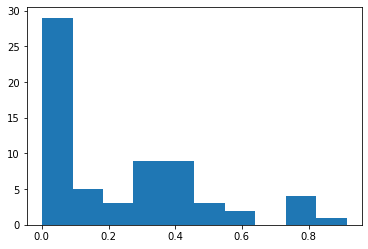

In [60]:
plt.hist(pache_defensive_opps[pache_defensive_opps.events == 'field_out'].estimated_ba_using_speedangle)
plt.show()

# Bryson Stott turning double plays as a Second basemen, or as a shortstop

In [90]:
stott_id = 681082

gidp = pps[pps.game_year.isin([2022,2023])
    &(pps.events == 'grounded_into_double_play')
   ]
df = pd.concat([gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ]
,gidp[(gidp.fielder_6 == stott_id)
     &(gidp.hit_location.isin([1,3,4]))
    ]
          ])

In [91]:
gidp[(gidp.fielder_4 == stott_id)
     &(gidp.hit_location.isin([1,5,6]))
    ].groupby(['fielder_4','game_year'],as_index=False).agg({'des' : 'count'})

,fielder_4,game_year,des
0,681082,2022,18
1,681082,2023,63


In [92]:
df[df.fielder_4 == stott_id][['game_date'
    ,'inning'
    ,'hit_location'
    #,'fielder_4'
    #,'fielder_6'
    ,'pitcher'
    ,'player_name'
    ,'pitch_type'
    ,'release_speed'
    ,'release_spin_rate'
    ,'launch_speed'
                              ,'estimated_ba_using_speedangle'
   ]].sort_values(by='estimated_ba_using_speedangle',ascending=False).head(5)

,game_date,inning,hit_location,pitcher,player_name,pitch_type,release_speed,release_spin_rate,launch_speed,estimated_ba_using_speedangle
180325,2023-09-11,4,6.0,547179,"Lorenzen, Michael",SL,85.6,2435.0,99.7,0.657
188704,2023-07-06,11,6.0,621381,"Strahm, Matt",FF,92.9,2378.0,104.0,0.617
202752,2023-10-07,8,6.0,621381,"Strahm, Matt",SL,85.7,2444.0,103.4,0.600
202846,2023-10-04,6,6.0,605400,"Nola, Aaron",SI,90.5,2152.0,100.3,0.597
181310,2023-09-05,7,5.0,592229,"Covey, Dylan",SI,96.0,2056.0,105.4,0.569


In [93]:
group = 'game_year'
for group in ['game_year','pitcher','fielder_4']:
    print(gidp.groupby(group,as_index=False).agg({'des' : 'count'}))#.sort_values(by='des',ascending=False)

   game_year  des
0       2022  113
1       2023  103
    pitcher  des
0    502043   16
1    502085    4
2    518886    4
3    543272    3
4    544727    5
5    547179    7
6    554430   20
7    571446    2
8    592229    5
9    592789    7
10   592836    8
11   596117    1
12   605400   28
13   607755    3
14   608349    1
15   621107    6
16   621237    6
17   621381    4
18   622554    8
19   624133   31
20   628708    3
21   642397    4
22   650911   14
23   656322    2
24   656546    2
25   656793    3
26   656814    3
27   663559    8
28   663975    1
29   668941    1
30   672839    3
31   674681    2
32   686842    1
   fielder_4  des
0     516416   66
1     543281    6
2     622168    8
3     622666    5
4     624641    1
5     656495    1
6     663837    1
7     665155    6
8     666801    3
9     681082  119


In [94]:
gidp.groupby('hit_location',as_index=False).agg({'des' : 'count'})

,hit_location,des
0,1.0,13
1,2.0,2
2,3.0,11
3,4.0,58
4,5.0,49
5,6.0,83


# Aaron Nola Weather

In [95]:
weather = pd.read_csv('C:\\Users\\Kellen\\Downloads\\Philly Weather 2015 to 20230707.csv')

In [96]:
weather['Date'] = pd.to_datetime(weather.DATE_VALUE)
weather['date'] = weather['Date'].dt.date

In [97]:
pps['date'] = pd.to_datetime(pps.game_date).dt.date
nola = pps[pps.pitcher == nola_id].merge(weather, left_on = 'date', right_on = 'date')

In [98]:
df = nola[nola.home_team == 'PHI']

In [99]:
temps = df.groupby('game_date',as_index=False).agg({'MAX_TEMPERATURE' : 'max'})

In [100]:
final = results('game_date').merge(temps,left_on = 'game_date',right_on='game_date')

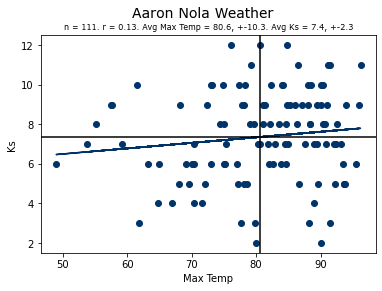

In [101]:
x = final.MAX_TEMPERATURE
y = final.strikeouts
title = 'Aaron Nola Weather'
xlabel = 'Max Temp'
ylabel = 'Ks'
colors = '#003469'
graph(x,y,title,xlabel,ylabel,colors)

In [102]:
def graph(x,y, title, xlabel, ylabel, colors):
    r = round(x.corr(y),2) # Calculate correlation coefficient
    m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
    #title = 'Velo vs. Spin Rate' # Title the graph
    #xlabel = 'Spin' # Label the x axis
    #ylabel = 'Velo' # Label the y axis

    # Build the plot
    plt.scatter(x, y, c = colors, alpha = 1) # Scatter plot, intentionally made transparent
    plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
    plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
    plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y
    plt.suptitle(title, fontsize = 14, fontname = 'Verdana') # Title
    plt.title('n = {}. r = {}. Avg {} = {}, +-{}. Avg {} = {}, +-{}'.format(len(x)
                                                                    ,r
                                                                      ,xlabel
                                                                      ,round(x.mean(),1)
                                                                      ,round(x.std(),1)
                                                                      ,ylabel
                                                                      ,round(y.mean(),1)
                                                                      ,round(y.std(),1)
                                                                     ), fontsize = 8, fontname = 'Verdana') # Subtitle
    plt.xlabel(xlabel) # Label the x axis
    plt.ylabel(ylabel) # Label the y axis
    plt.show()

# Roman Quinn infield hits

In [103]:
quinn_id = 596451
rq = pos[pos.batter == quinn_id]
rq[rq.events == 'single'][['game_date'
                          ,'inning'
                          ,'launch_speed'
                          ,'launch_angle'
                          ]
                         ].sort_values(by='launch_speed').head(20)

,game_date,inning,launch_speed,launch_angle
123950,2020-08-28,10,28.4,-76.0
144014,2021-05-29,5,30.5,-10.0
102010,2019-08-05,4,32.7,14.0
172696,2022-04-28,3,34.1,-41.0
120272,2020-09-20,2,34.3,29.0
124331,2020-08-25,7,36.7,43.0
124619,2020-08-22,9,38.4,-64.0
115937,2019-04-20,4,43.4,-45.0
126333,2020-08-10,6,52.7,-48.0
147543,2021-05-04,2,64.7,26.0


# 2016-2018 Pitching

## Jake Thompson
He has punched out some truly wild guys, lots of MVPs and former Phillies. Also lots of pitchers. That is it.

## Drew Anderson
This fucking guy. He barely pitched but he struck out Mike Trout!

## Ricardo Pinto
I should give some true TLC to the Ricardo Pinto game.

## Yacksel Rios
I was a big fan.

## Edubray Ramos
Ya momma sitting on ma dick!

## Victor Arano
Dude was legit.

# Phillies Walk Off Home Runs in the Statcast Era

In [119]:
pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_year',as_index=False # groupby
            ).agg({'des' : 'count'}
                 ).sort_values(by='des',ascending=False)

,game_year,des
2,2017,9
4,2019,9
3,2018,8
7,2022,8
6,2021,6
8,2023,6
0,2015,5
1,2016,4
5,2020,1


In [120]:
df=pos[(pos.events == 'home_run') & (pos.inning_topbot == 'Bot') & (pos.inning >= 9) # filters
   ].groupby('game_pk',as_index=False # groupby
            ).agg({'game_year' : 'max'
                   ,'game_date' : 'max'
                   ,'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                   ,'batter' : 'nunique'
                   ,'inning' : 'max'
                   ,'player_name' : 'max'
                   }
                 ).sort_values(by=['game_year','game_date'],ascending=False)
df

,game_pk,game_year,game_date,post_home_score,post_away_score,batter,inning,player_name
45,716618,2023,2023-09-12,6,6,1,9,"Turner, Trea"
48,717664,2023,2023-09-11,8,8,1,9,"Harper, Bryce"
46,716879,2023,2023-08-23,5,5,1,9,"Harper, Bryce"
47,717418,2023,2023-07-14,2,8,1,9,"Realmuto, J.T."
49,717837,2023,2023-06-09,5,4,1,9,"Schwarber, Kyle"
50,718043,2023,2023-05-24,5,5,1,9,"Turner, Trea"
41,661591,2022,2022-09-20,11,18,1,9,"Realmuto, J.T."
39,661563,2022,2022-07-26,3,6,1,9,"Realmuto, J.T."
38,661560,2022,2022-07-22,2,15,1,9,"Hall, Darick"
40,661583,2022,2022-06-15,3,1,1,9,"Stubbs, Garrett"


In [122]:
#df[df.game_year == 2023] # 1 walk off
#df[df.game_year == 2022] # 2 walk offs
df[df.game_year == 2021] # 3 walk offs
#df[df.game_year == 2020] # 2 HRs

,game_pk,game_year,game_date,post_home_score,post_away_score,batter,inning,player_name
31,632537,2021,2021-09-10,1,11,1,9,"Gregorius, Didi"
32,632808,2021,2021-08-27,6,6,1,10,"Miller, Brad"
33,633168,2021,2021-07-26,6,5,1,9,"McCutchen, Andrew"
34,633299,2021,2021-07-17,4,2,1,10,"Realmuto, J.T."
35,633764,2021,2021-06-09,2,1,1,9,"Williams, Luke"
36,634439,2021,2021-04-20,7,10,1,9,"Hoskins, Rhys"


In [129]:
for gy in df.game_year.unique():
    #late_hrs = len(df[df.game_year == gy])
    walk_offs = df[(df.game_year == gy)
       &(df.post_home_score > df.post_away_score)
      ]
    print(gy, ':', len(walk_offs), '/', len(df[df.game_year == gy]), '=', round(len(walk_offs)/len(df[df.game_year == gy]),3))

2023 : 1 / 6 = 0.167
2022 : 2 / 8 = 0.25
2021 : 3 / 6 = 0.5
2020 : 1 / 1 = 1.0
2019 : 4 / 7 = 0.571
2018 : 4 / 8 = 0.5
2017 : 0 / 7 = 0.0
2016 : 1 / 3 = 0.333
2015 : 2 / 5 = 0.4


In [136]:
df[df.game_year == 2015][['inning', 'post_home_score', 'post_away_score', 'player_name']]
                         #,'launch_speed', 'launch_angle'

,inning,post_home_score,post_away_score,player_name
4,10,7,7,"Galvis, Freddy"
3,9,7,5,"Asche, Cody"
2,9,8,7,"Francoeur, Jeff"
1,9,4,4,"Franco, Maikel"
0,9,3,4,"Herrera, Odúbel"


In [143]:
pos[(pos.game_pk.isin(df[df.batter >1].game_pk.unique()))
    &(pos.inning >= 9)
    &(pos.events == 'home_run')
   ][['game_year', 'game_date', 'inning', 'at_bat_number'
     ,'player_name', 'launch_speed', 'launch_angle']].sort_values(by='game_year', ascending = False)#.agg({'game_year' : 'count'})

,game_year,game_date,inning,at_bat_number,player_name,launch_speed,launch_angle
106892,2019,2019-06-27,9,73,"Segura, Jean",102.3,20.0
106959,2019,2019-06-27,9,69,"Franco, Maikel",99.7,21.0
109173,2019,2019-06-10,9,88,"Bruce, Jay",103.2,40.0
109198,2019,2019-06-10,9,86,"Hoskins, Rhys",98.8,41.0
51358,2017,2017-08-22,9,79,"Blanco, Andrés",96.1,30.0
51401,2017,2017-08-22,9,75,"Joseph, Tommy",102.9,31.0
64866,2017,2017-05-10,9,92,"Joseph, Tommy",105.8,28.0
64886,2017,2017-05-10,9,90,"Altherr, Aaron",107.9,25.0
37832,2016,2016-06-06,9,72,"Galvis, Freddy",99.9,30.0
37843,2016,2016-06-06,9,73,"Joseph, Tommy",102.3,22.0


In [42]:
df = phils_sc_24 = phils_sc[phils_sc.game_year == 2024]
df.groupby(['game_year'
            #,'p_throws'
           ],as_index=False).agg({'game_pk' : 'nunique'})

df = phils_sc
df['date'] = pd.to_datetime(df.game_date)

df['month'] = df.date.dt.month

In [37]:
years = pd.DataFrame()
for g in phils_sc.game_year.unique().tolist():
    df = phils_sc[phils_sc.game_year == g]
    x = results('month')
    x['year'] = g
    years = pd.concat([years,x])

years

In [50]:
x = df.groupby('month',as_index=False).agg({'game_pk' : 'nunique'
                                        ,'game_year' : 'nunique'
                                       }).sort_values(by='game_pk',ascending=False)

x['games_per_month'] = x.game_pk / x.game_year
x.sort_values(by='games_per_month',ascending=False)
# Typically 27 games in a long month. How about 29 games being 18% of the total year

,month,game_pk,game_year,games_per_month
5,8,249,9,27.666667
2,5,221,8,27.625000
6,9,247,9,27.444444
3,6,213,8,26.625000
1,4,223,9,24.777778
4,7,205,9,22.777778
7,10,43,6,7.166667
8,11,4,1,4.000000
0,3,10,4,2.500000


# The Story of the Season So Far
This is my blog about the current state of the tourism industry. Jesus Fucking Christ.

No, it is about the Phillies season so far.

By team: phils_sc
<br>games per month - groupby('month').agg({'game_pk' : 'nunique'})
<br>runs per month 
<br>team ERA per month
<br>team results, results('game_year')
<br>results('month')
<br>results('home_team')
<br>results('away_team')
<br>results('p_throws')
<br>results('stand')

In [59]:
po24_players = results('player_name').sort_values(by='woba',ascending=False)
po24_game_year = results('game_year').sort_values(by='woba',ascending=False)
po24_home_team = results('home_team').sort_values(by='woba',ascending=False)
po24_away_team = results('away_team').sort_values(by='woba',ascending=False)
po24_p_throws = results('p_throws').sort_values(by='woba',ascending=False)
po24_stand = results('stand').sort_values(by='woba',ascending=False)

groups = [po24_players
,po24_game_year,
po24_home_team
,po24_away_team
,po24_p_throws
,po24_stand
]
for g in groups:
    print(g)

          player_name  pitches  plate_apps  bip  hits  hrs  walks  strikeouts  \
2       Clemens, Kody       16           4    3     2  1.0    0.0           1   
0          Bohm, Alec      474         131   97    42  4.0   14.0          20   
13       Turner, Trea      567         146  107    45  2.0    9.0          27   
4      Marsh, Brandon      442         103   62    25  6.0    7.0          34   
3       Harper, Bryce      485         120   76    24  6.0   16.0          28   
10      Sosa, Edmundo       91          22   14     5  1.0    1.0           6   
9     Schwarber, Kyle      591         147   78    26  8.0   21.0          48   
7      Realmuto, J.T.      451         115   74    26  5.0    6.0          33   
11      Stott, Bryson      403         102   74    20  3.0   10.0          17   
8        Rojas, Johan      314          91   71    20  1.0    6.0          13   
5    Merrifield, Whit      192          51   43    11  1.0    3.0           4   
6     Pache, Cristian       

In [57]:
df = pos[pos.game_year == 2024]
def story(df):
    year_totals = results('game_year')
    

In [58]:
pos.groupby('game_year',as_index=False).agg({'des' : 'count'
                                               ,'game_pk' : 'nunique'
                                              })
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2024,4661,1203,810,273,40,110,274,0.254,0.323,0.413,0.736,0.327


I thought I had a sentence on each player. Maybe I wrote it out by hand? <br>
How do you think I am managing the nonsense.

# Zack Wheeler on Extra Rest
How about the piggyback?
Pitching Staff Thoughts <br>
1. Zack Wheeler. Stud, but something seems a little off in the early going.
2. Aaron Nola, stud. Deserving of the contract.
3. Ranger Suarez, the story of the season. He is going to narrate this portion of the video yearbook.
4. Cristopher Sanchez, lost command of the changeup because he is overthrowing his fastball and slider.
5. Spencer Turnbull, some really good outings but fading. Regressing to mean? Expectations? Mike Lo or Andrew Vazquez?
6. Taijuan Walker, one start and gave up 6 runs.
7. Jeff Hoffman, closer now.
8. Gregory Soto, lights out for the most part.
9. Jose Alvarado, shaky but high leverage.
10. Seranthony, struggling? Not getting whiffs ont he slider, not throwing strikes with FF.
11. Orion Kerkering, just came back but has had two bad outings. Elite stuff.
12. Yunior Marte, hot hand in the early going, coming back down?
13. Ricardo Pinto, nice story and ate 4 innings in an early April game. Length, depth.
14. Nick Nelson, has thrown pitches for this team.
15. Connor Brogdon, DFAd
16. Matt Strahm, forgettable.


Nick Castellanos points to the HR
Rojas pimped it too.
Alec Bohm w RISP

Batting Thoughts:
1. Kyle Schwarber, quality at bats vs ops, woba, runs_created. What is the value of pitches_per_pa at the top of your lineup?
2. Trea Turner, really good so far.
3. Bryce Harper, unlucky?
4. Alec Bohm, elite w RISP
5. J.T. Realmuto, on pace for 30 HRs
6. Brandon Marsh, hot start, hitting the ball hard, not whiffing.
7. Nick Castellanos, brutal but will positive regress
8. Bryson Stott, has to platoon with 35 yo Whit Merrifiel
9. Johan Rojas, what a trip.
10. Whit Merrifield, trash bad underlying.
11. Edmundo Sosa, solid underlying small sample.
12. Cristian Pache, exists brother.
13. Garrett Stubbs

14. Kody Clemens
15. Jake Cave

In [73]:
players = pps.groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                              ,'game_pk' : 'nunique'
                                              ,'des' : 'count'
                                              #,'pitch_type' : '
                                             })

In [74]:
df = pps[pps.game_year == 2024]
x=df.groupby(['pitcher','game_pk','inning_topbot'],as_index=False).agg({'post_home_score' : 'max'
                                                                       ,'post_away_score' : 'max'
                                                                       ,'game_pk' : 'nunique'
                                                                       ,'at_bat_number' : 'nunique'
                                                                       #,'pitch_type' 
                                                                      }).merge(players,left_on = 'pitcher',right_on='pitcher')
                                                                               

In [79]:
pos[pos.game_year == 2024].groupby('player_name',as_index=False).agg({'batter' : 'max'})

,player_name,batter
0,"Bohm, Alec",664761
1,"Castellanos, Nick",592206
2,"Clemens, Kody",665019
3,"Harper, Bryce",547180
4,"Marsh, Brandon",669016
5,"Merrifield, Whit",593160
6,"Pache, Cristian",665506
7,"Realmuto, J.T.",592663
8,"Rojas, Johan",679032
9,"Schwarber, Kyle",656941


# Who is the Best Defensive Catcher in Baseball?